# CI7520 –Assignment 1: Classical Machine Learning

by 

Adrian Bandy (K2132274)

Shashwat Bhardwaj (K2149137)

Royce Daran Shakespeare (K2046699)

Padmesh Upadhyay (K2136572)

#1) Introduction

In this assignment we will be exploring a variety of clustering and classification models using sklearn and the breast cancer dataset.


In [ ]:
#Importing The Required Libraries

#Data and data manipulation libraries
from sklearn import datasets
import pandas as pd
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.tree import plot_tree
from sklearn.inspection import plot_partial_dependence


#Data preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

#Models
from sklearn import cluster
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

#Hyperparameter Tuning and processing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict

#Scoring and Performance Evaluation
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import homogeneity_completeness_v_measure
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

## 1.1) Declared Functions

Using the DRY (Dont Repeat Yourself) method as outlined in The Pragmatic Programmer [1] we will declare functions that we use multiple times.
This has the benefit of less and cleaner code, which is far easier to update or maintain.

##### [1] Hunt, A., Thomas, D. and Cunningham, W., 2015. The pragmatic programmer. Boston: Addison-Wesley, Chapter 2.

In [ ]:
def clustering_performance_evaluation(X, predicted_labels, print_output = False):
  '''
  Accepts data of shape 2d and the predicted labels
  Returns a series of different clustering scores
  If print_output = True it will print the scores as well as returning them
  '''
  #silhouette is mean intra-cluster distance - nearest-cluster distance
  #divided by the maximum of these two.
  #Values between 1 and -1. 1 being best score achievable.
  sil_score = silhouette_score(X, predicted_labels)
        
  #Calinski-Harabasz score
  #Ratio of sum of the inter-cluster dispersion and intra-cluster dispersion
  #Higher values better
  cal_har_score = calinski_harabasz_score(X, predicted_labels)
    
  #David-Bouldin Score
  #Avg similarity within cluster. 
  #Similarity is ratio of intra-cluster to inter-cluster
  #Low values are better (minima is 0)
  db_score = davies_bouldin_score(X, predicted_labels)
      
  if print_output == True:
      print(f"Silhouette Score: {sil_score:.3f}\
      \nCalinski-Harabasz Score: {cal_har_score:.3f}\
      \nDavid-Bouldin Score: {db_score:.3f}")
    
  if print_output == False:
      return [sil_score, cal_har_score, db_score]

def classification_performance_evaluation(y_true, y_pred, print_output = False):
  '''
  Accepts data of the ground truth labels and the predicted labels
  Returns a series of different classification scores
  If print_output = True it will print the scores as well as returning them
  '''
  #Both homogeneity and completeness have values 0 to 1. 
  #Larger values being preferable
  #V measure is a 'harmonic' mean of homogeneity and completeness
  h,c,v = homogeneity_completeness_v_measure(y_true, y_pred)
    
  #accuracy score displays % of labels correctly labelled.
  acc_score = accuracy_score(y_true, y_pred)
    
  #balanced accuracy to adjust for inbalanced classes
  bal_acc_score = balanced_accuracy_score(y_true, y_pred)
    
  #f1_score
  #Harmonic mean of precision and recall
  #Values of 0 to 1. 1 is best.
  score_f1 = f1_score(y_true, y_pred)
    
  if print_output == True:
      print(f"Homogeneity Score: {h:.3f}\
      \nCompleteness Score: {c:.3f}\
      \nV_measure Score: {v:.3f}\
      \nAccuracy Score: {acc_score:.3f}\
      \nBalanced Accuracy Score: {bal_acc_score:.3f}\
      \nF1 Score: {score_f1:.3f}")

  if print_output == False:
      return [h, c, v, acc_score, bal_acc_score, score_f1]

def classification_using_clustering_performance_evaluation(y_true, y_pred, print_output = False, classification = True):
  '''
  Accepts data of the ground truth labels and the predicted labels
  Returns a series of different clustering and classification scores
  If print_output = True it will print the scores as well as returning them
  If classification = False will correct accuracy metrics (because clustering does not ascribe which cluster is which label)
  '''
  #Both homogeneity and completeness have values 0 to 1. 
  #Larger values being preferable
  #V measure is a 'harmonic' mean of homogeneity and completeness
  h,c,v = homogeneity_completeness_v_measure(y_true, y_pred)
    
  #accuracy score displays % of labels correctly labelled.
  acc_score = accuracy_score(y_true, y_pred)
    
  #balanced accuracy to adjust for inbalanced classes
  bal_acc_score = balanced_accuracy_score(y_true, y_pred)
    
  #f1_score
  #Harmonic mean of precision and recall
  #Values of 0 to 1. 1 is best.
  score_f1 = f1_score(y_true, y_pred)

  #Adjusted rand score
  #Similarity between clusters by counting all pairs of clusters,
  #Higher values when greater proportion is in correct cluster
  adj_rand_score = adjusted_rand_score(y_true, y_pred)
    
  #if a clustering method selected that did not have information about labels select classification as False
  if classification == False:
      #Must take maximum of 1-score and score because clustering method is only labelling two groups without
      #assigning which is which
      acc_score = max(acc_score, (1-acc_score))
      bal_acc_score = max(bal_acc_score, (1-bal_acc_score))
      score_f1 = max(score_f1, (1-score_f1))

      if print_output == True:
        print(f"Homogeneity Score: {h:.3f}\
        \nCompleteness Score: {c:.3f}\
        \nV_measure Score: {v:.3f}\
        \nAccuracy Score: {acc_score:.3f}\
        \nBalanced Accuracy Score: {bal_acc_score:.3f}\
        \nF1 Score: {score_f1:.3f}\
        \nAdjusted_rand_score : {adj_rand_score:.3f}")
      return [h, c, v, acc_score, bal_acc_score, score_f1, adj_rand_score]
  
  
  elif classification == True: 
    if print_output == True:
      print(f"Homogeneity Score: {h:.3f}\
      \nCompleteness Score: {c:.3f}\
      \nV_measure Score: {v:.3f}\
      \nAccuracy Score: {acc_score:.3f}\
      \nBalanced Accuracy Score: {bal_acc_score:.3f}\
      \nF1 Score: {score_f1:.3f}\
      \nAdjusted_rand_score : {adj_rand_score:.3f}")
    
  if print_output == False:
      return [h, c, v, acc_score, bal_acc_score, score_f1, adj_rand_score]
    
def plot_precision_recall(y_true, y_pred):
  '''
  Accepts ground truth and prediction labels
  Plots a precision recall graph
  '''
  #Plots the precision_recall_graph
  PrecisionRecallDisplay.from_predictions(y_true, y_pred)
  plt.ylim(0,1)
  plt.show()

def plot_roc_and_print_auc(y_true, y_pred):
  '''
  Accepts ground truth and prediction labels
  Plots a ROC curve with AUC calculated value
  '''
  #Plots the Receiver Operating Characteristic
  #And prints the ROC_AUC (area under curve) value
  #Values of 0 to 1. 1 is best
  false_positive_rate, true_positive_rate, threshold  =  roc_curve(y_true, y_pred)
  area_under_curve = round(roc_auc_score(y_true, y_pred), 3)
  zero_to_one_array = np.linspace(0,1,100)
    
  #plot x = y graph
  plt.plot(zero_to_one_array, zero_to_one_array, linestyle = 'dashed', c = 'k')
  plt.plot(false_positive_rate, true_positive_rate, label = (f"Area Under Curve:\n{area_under_curve}"))
  plt.legend(loc = 'lower right')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve and AUC Score')
  plt.show()
    
def plot_confusion_matrix(y_true, y_pred):    
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
  plt.show()

## 1.2) Loading The Data

In [ ]:
#Load data as json
bcd = datasets.load_breast_cancer()
#Load data as frames
# X, y = datasets.load_breast_cancer(return_X_y = True, as_frame = True)
#Convert frames to single dataframe
# df = pd.concat([X, y], axis =1)

In [ ]:
X = bcd.data

In [ ]:
y = bcd.target

In [ ]:
X_columns = bcd.feature_names

In [ ]:
#Print first 3 rows
print(X_columns)
for i in range(3):
  print(X[i])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+

## 1.3) Printing Key Aspects Of The Data


In [ ]:
print("In the Breast Cancer Dataset:")
print(f"Number of samples is: {len(bcd.data)}")
print(f"Number of features columns is: {len(bcd.data[0])}")
print(f"Number of target columns is: {bcd.target.ndim}")
print(f"Number of classes is: {len(np.unique(bcd.target))}")
print(f"Class names are:  {np.unique(bcd.target_names[0])}, {np.unique(bcd.target_names[1])} (0 and 1)")
print(f"\nClass type and the respective number of samples in each class is:\n{print(bcd.DESCR[3085:3140])}")
print(f"\nNumber of null values in each column are:\n{np.isnan(X).sum(axis = 0)}")
print(f"\nFeature names are:\n{bcd.feature_names}")
print(f"\nDataset description is\n{bcd.DESCR}")

In the Breast Cancer Dataset:
Number of samples is: 569
Number of features columns is: 30
Number of target columns is: 1
Number of classes is: 2
Class names are:  ['malignant'], ['benign'] (0 and 1)
Class Distribution: 212 - Malignant, 357 - Benign

    

Class type and the respective number of samples in each class is:
None

Number of null values in each column are:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Feature names are:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimen

In [ ]:
#Print Key Statistical Summary Of The Dataset
print("Here are some sample statistics:")
for i in range(len(X_columns)):
  print(f"For column '{X_columns[i]}':")
  print(f"Minimum is {np.min(X[:,i]):.3f}")
  print(f"Mean is {np.mean(X[:,i]):.3f}")
  print(f"Maxima is {np.max(X[:,i]):.3f}")
  print(f"Standard Deviation is {np.std(X[:,i]):.3f}\n")

Here are some sample statistics:
For column 'mean radius':
Minimum is 6.981
Mean is 14.127
Maxima is 28.110
Standard Deviation is 3.521

For column 'mean texture':
Minimum is 9.710
Mean is 19.290
Maxima is 39.280
Standard Deviation is 4.297

For column 'mean perimeter':
Minimum is 43.790
Mean is 91.969
Maxima is 188.500
Standard Deviation is 24.278

For column 'mean area':
Minimum is 143.500
Mean is 654.889
Maxima is 2501.000
Standard Deviation is 351.605

For column 'mean smoothness':
Minimum is 0.053
Mean is 0.096
Maxima is 0.163
Standard Deviation is 0.014

For column 'mean compactness':
Minimum is 0.019
Mean is 0.104
Maxima is 0.345
Standard Deviation is 0.053

For column 'mean concavity':
Minimum is 0.000
Mean is 0.089
Maxima is 0.427
Standard Deviation is 0.080

For column 'mean concave points':
Minimum is 0.000
Mean is 0.049
Maxima is 0.201
Standard Deviation is 0.039

For column 'mean symmetry':
Minimum is 0.106
Mean is 0.181
Maxima is 0.304
Standard Deviation is 0.027

For col

## 1.4) Feature Engineering
Many of these features relate to the same aspect of the data.

Therefore there is extra information that can be extracted.

To do this we will create retain the feaures so far and create a variety of new derived features

Coding inspired and expanded from [2]

[2] Python Feature Engineering Cookbook - Packt 2020, Chapter 9 - Applying Mathematical Computations to Features

In [ ]:
#create new 'difference' columns
original_col_length = len(X_columns)
for i in range(original_col_length - 20):
    new_col_name = str(''.join([X_columns[i+20][:5], ' - ',X_columns[i]]))
    print(new_col_name)
    X_columns = np.append(X_columns,new_col_name) 
    new_column_data = X[:,[i+20]] - X[:,[i]]
    X = np.concatenate((X, new_column_data), axis = 1)

worst - mean radius
worst - mean texture
worst - mean perimeter
worst - mean area
worst - mean smoothness
worst - mean compactness
worst - mean concavity
worst - mean concave points
worst - mean symmetry
worst - mean fractal dimension


In [ ]:
#create new 'ratio' columns
for i in range(original_col_length - 20):
    new_col_name = str(''.join(['ratio of ', X_columns[i+20][:5].strip(), ' to ',X_columns[i]]))
    print(new_col_name)
    X_columns = np.append(X_columns,new_col_name) 
    new_column_data = X[:,[i+20]] / X[:,[i]]
    X = np.concatenate((X, new_column_data), axis = 1)

ratio of worst to mean radius
ratio of worst to mean texture
ratio of worst to mean perimeter
ratio of worst to mean area
ratio of worst to mean smoothness
ratio of worst to mean compactness
ratio of worst to mean concavity
ratio of worst to mean concave points
ratio of worst to mean symmetry
ratio of worst to mean fractal dimension


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


Error message given as we have generated some nan values:

In [ ]:
np.argwhere(np.isnan(X))

array([[101,  46],
       [101,  47],
       [140,  46],
       [140,  47],
       [174,  46],
       [174,  47],
       [175,  46],
       [175,  47],
       [192,  46],
       [192,  47],
       [314,  46],
       [314,  47],
       [391,  46],
       [391,  47],
       [473,  46],
       [473,  47],
       [538,  46],
       [538,  47],
       [550,  46],
       [550,  47],
       [557,  46],
       [557,  47],
       [561,  46],
       [561,  47],
       [568,  46],
       [568,  47]])

We shall deal with these after the pre-processing scaling

We can also create features from distribution of each of the mean, error and worst features respectively.

In [ ]:
# Mean error and worst features are in 

# mean_features = list(X.columns[:10])
# error_features = list(X.columns[10:20])
# worst_features = list(X.columns[20:30])
   
X_columns = np.append(X_columns, ['min_of_mean_features', 'mean_of_mean_features', 'max_of_mean_features',
                                  'std_of_mean_features', 'multiple_of_mean_features', 'sum_of_mean_features',
                                  'min_of_error_features', 'mean_of_error_features', 'max_of_error_features', 
                                  'std_of_error_features', 'multiple_of_error_features', 'sum_of_error_features', 
                                  'min_of_worst_features', 'mean_of_worst_features', 'max_of_worst_features', 
                                  'std_of_worst_features', 'multiple_of_worst_features', 'sum_of_worst_features']) 

for feature_ranges_data in (X[:,0:10], X[:,10:20], X[:,20:30]):
  min_data = np.amin(feature_ranges_data, axis = 1).reshape(569,1)
  mean_data = np.mean(feature_ranges_data, axis = 1).reshape(569,1)
  max_data = np.amax(feature_ranges_data, axis = 1).reshape(569,1)
  std_data = np.std(feature_ranges_data, axis = 1).reshape(569,1)
  multiple_data = np.prod(feature_ranges_data, axis = 1).reshape(569,1)
  sum_data = np.sum(feature_ranges_data, axis = 1).reshape(569,1)
  new_data = np.concatenate((min_data, mean_data , max_data, std_data, multiple_data, sum_data), axis = 1)
  X = np.concatenate((X, new_data), axis = 1)

In [ ]:
print(f" The new number of feature columns is now {len(X_columns)}")
print(f" The shape of X data is now {X.shape[0]} rows by {X.shape[1]} columns")

 The new number of feature columns is now 68
 The shape of X data is now 569 rows by 68 columns


In [ ]:
#Combine X and y into complete 2d array for easier filtering.
data_complete = np.concatenate((X, y.reshape(569,1)), axis = 1)
print(f" The shape of the complete dataset is {data_complete.shape[0]} rows by {data_complete.shape[1]} columns")

 The shape of the complete dataset is 569 rows by 69 columns


In [ ]:
#create two sub arrays to contain the malignant and benign data
malignant = data_complete[data_complete[:,-1] == 0]
benign = data_complete[data_complete[:,-1] == 1]
print(f"The shape of the malignant dataset is {malignant.shape[0]} rows by {malignant.shape[1]} columns")
print(f"The shape of the benign dataset is {benign.shape[0]} rows by {benign.shape[1]} columns")
print(f"These match the values seen in the description:\n{(bcd.DESCR[3085:3140])}")

The shape of the malignant dataset is 212 rows by 69 columns
The shape of the benign dataset is 357 rows by 69 columns
These match the values seen in the description:
Class Distribution: 212 - Malignant, 357 - Benign

    


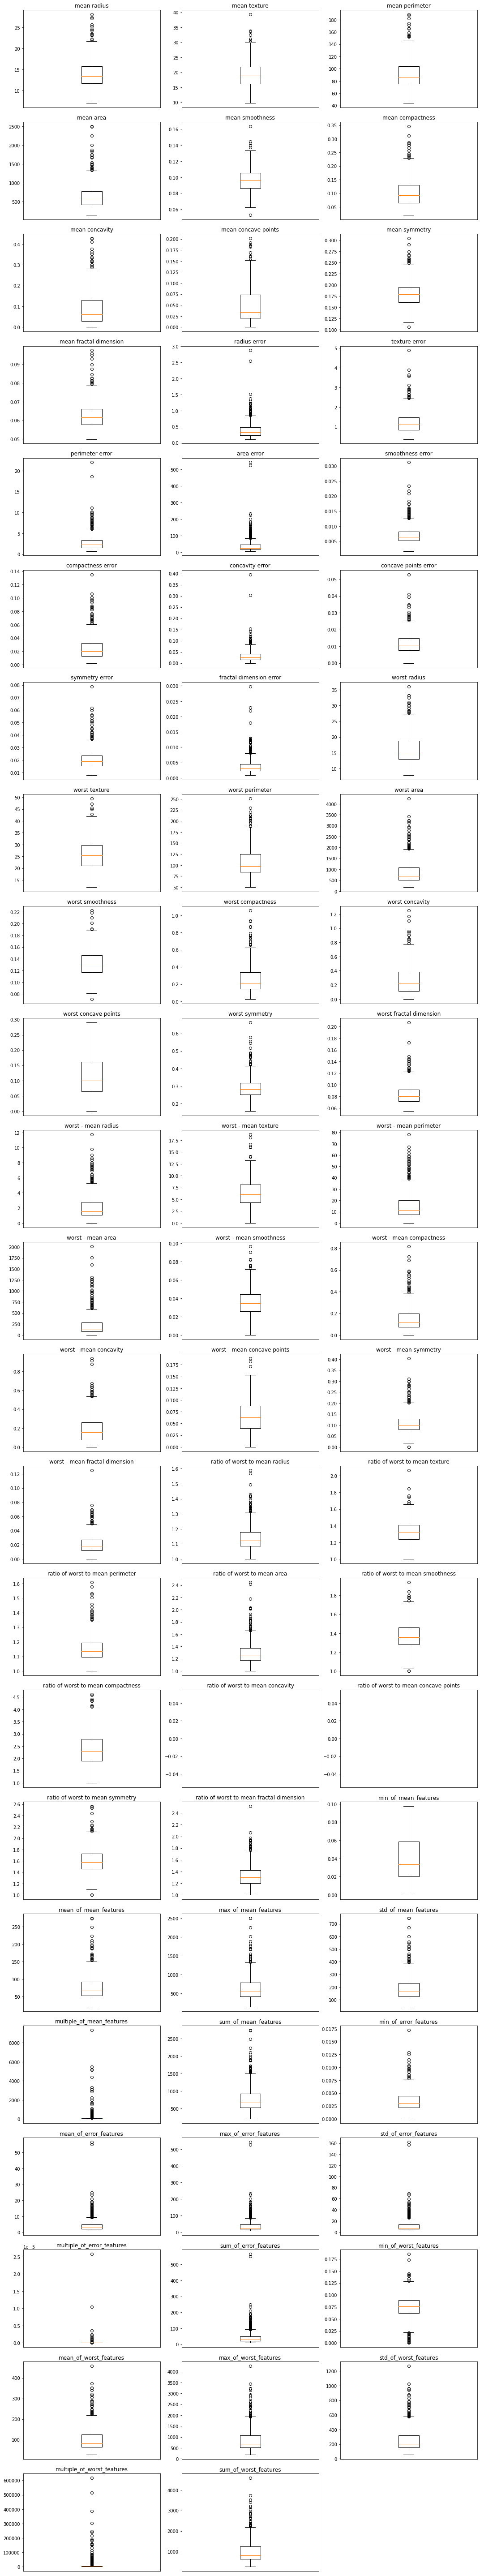

In [ ]:
#Show distribution of each feature as boxplots.
fig = plt.figure(figsize = (15,80))
for index, column_name in enumerate(X_columns):
    ax = fig.add_subplot(23,3,index + 1)
    plt.boxplot(x = X[:,index])
    plt.title(column_name)
    plt.xticks([])
plt.tight_layout()

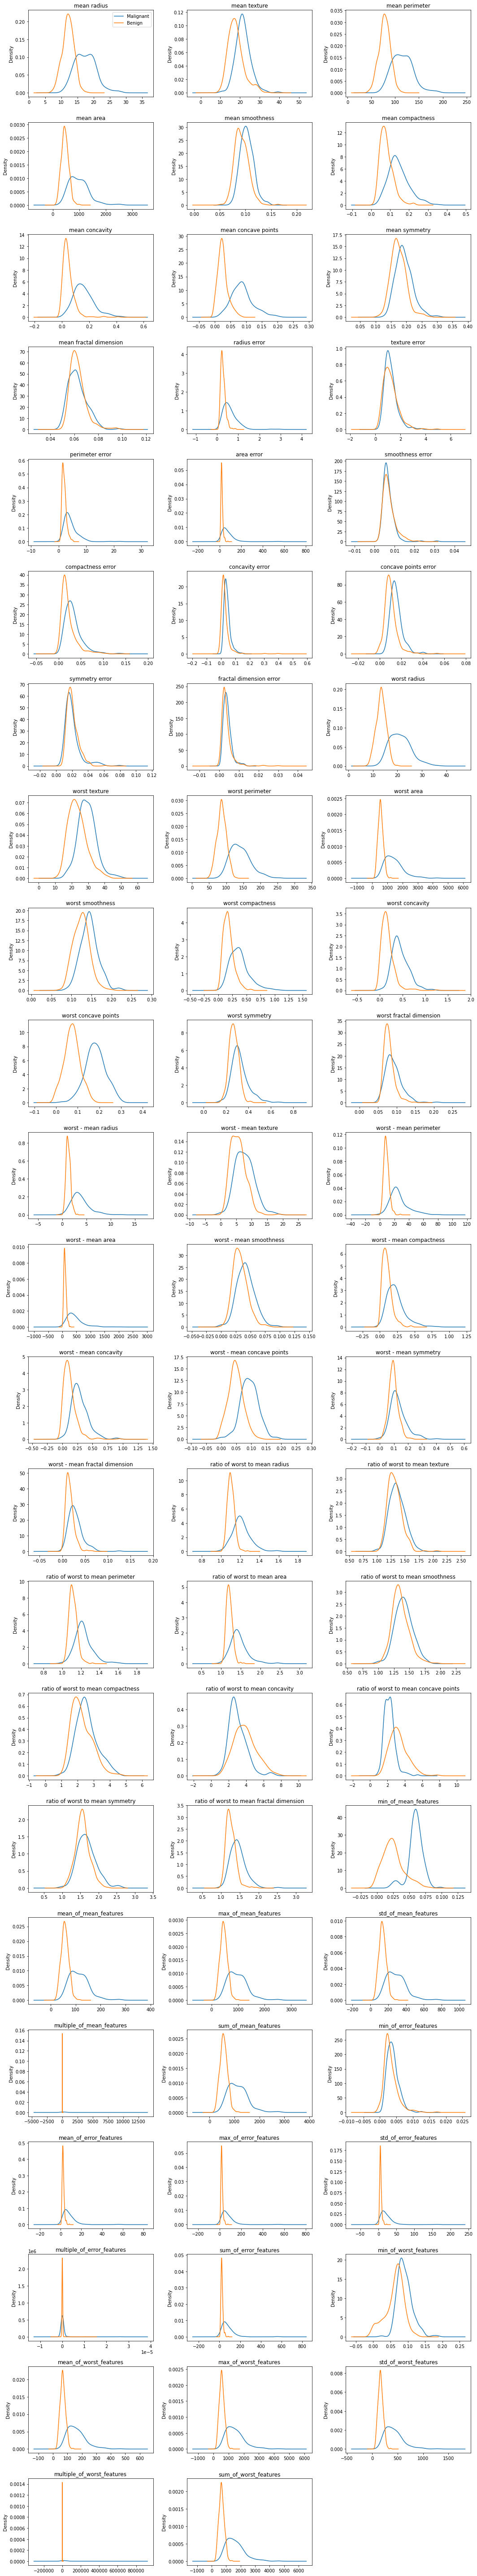

In [ ]:
#Show distribution overlap of each sub-dataframe (benign and malignant) feature as kde (kernel density plots).
#Requires temporary pandas dataframes for kde:

temp_df = pd.DataFrame(data_complete, columns = np.append(X_columns ,'target'))
temp_malignant = temp_df[temp_df['target'] == 0]
temp_benign = temp_df[temp_df['target'] == 1]
fig = plt.figure(figsize = (15,80))
for index, column_name in enumerate(X_columns):
    ax = fig.add_subplot(23,3,index + 1)
    temp_malignant[column_name].plot.kde(ax = ax, label = 'Malignant')
    temp_benign[column_name].plot.kde(ax = ax, label = 'Benign')
    plt.title(column_name)
    if index == 0:
        plt.legend()
plt.tight_layout()

In [ ]:
#Linear correlations with the target
# Positive correlation values mean a greater positive value in the column is more likely to be benign
# Negative correlation values mean a greater positive value in the column is more likely to be malignant

for index, row in (temp_df.corr()['target'].sort_values().drop('target').iteritems()):
  index_str_length = len(index)
  spacing = 40 - index_str_length
  if row >= 0:
    print(f"{index} {' '*(spacing+1)} {row:.3f}")
  else:
    print(f"{index} {' '*(spacing)} {row:.3f}")

worst concave points                      -0.794
worst perimeter                           -0.783
mean concave points                       -0.777
worst radius                              -0.776
min_of_mean_features                      -0.762
mean perimeter                            -0.743
mean_of_worst_features                    -0.740
sum_of_worst_features                     -0.740
worst area                                -0.734
max_of_worst_features                     -0.734
std_of_worst_features                     -0.733
mean radius                               -0.730
sum_of_mean_features                      -0.714
mean_of_mean_features                     -0.714
worst - mean radius                       -0.711
worst - mean perimeter                    -0.711
max_of_mean_features                      -0.709
mean area                                 -0.709
std_of_mean_features                      -0.709
mean concavity                            -0.696
worst - mean area   

In [ ]:
#create a list to place similar columns together (used for plotting purposes)
similar_column_ordered = []
for i in range(10):
    similar_column_ordered.append(X_columns[i])
    similar_column_ordered.append(X_columns[i+10])
    similar_column_ordered.append(X_columns[i+20])

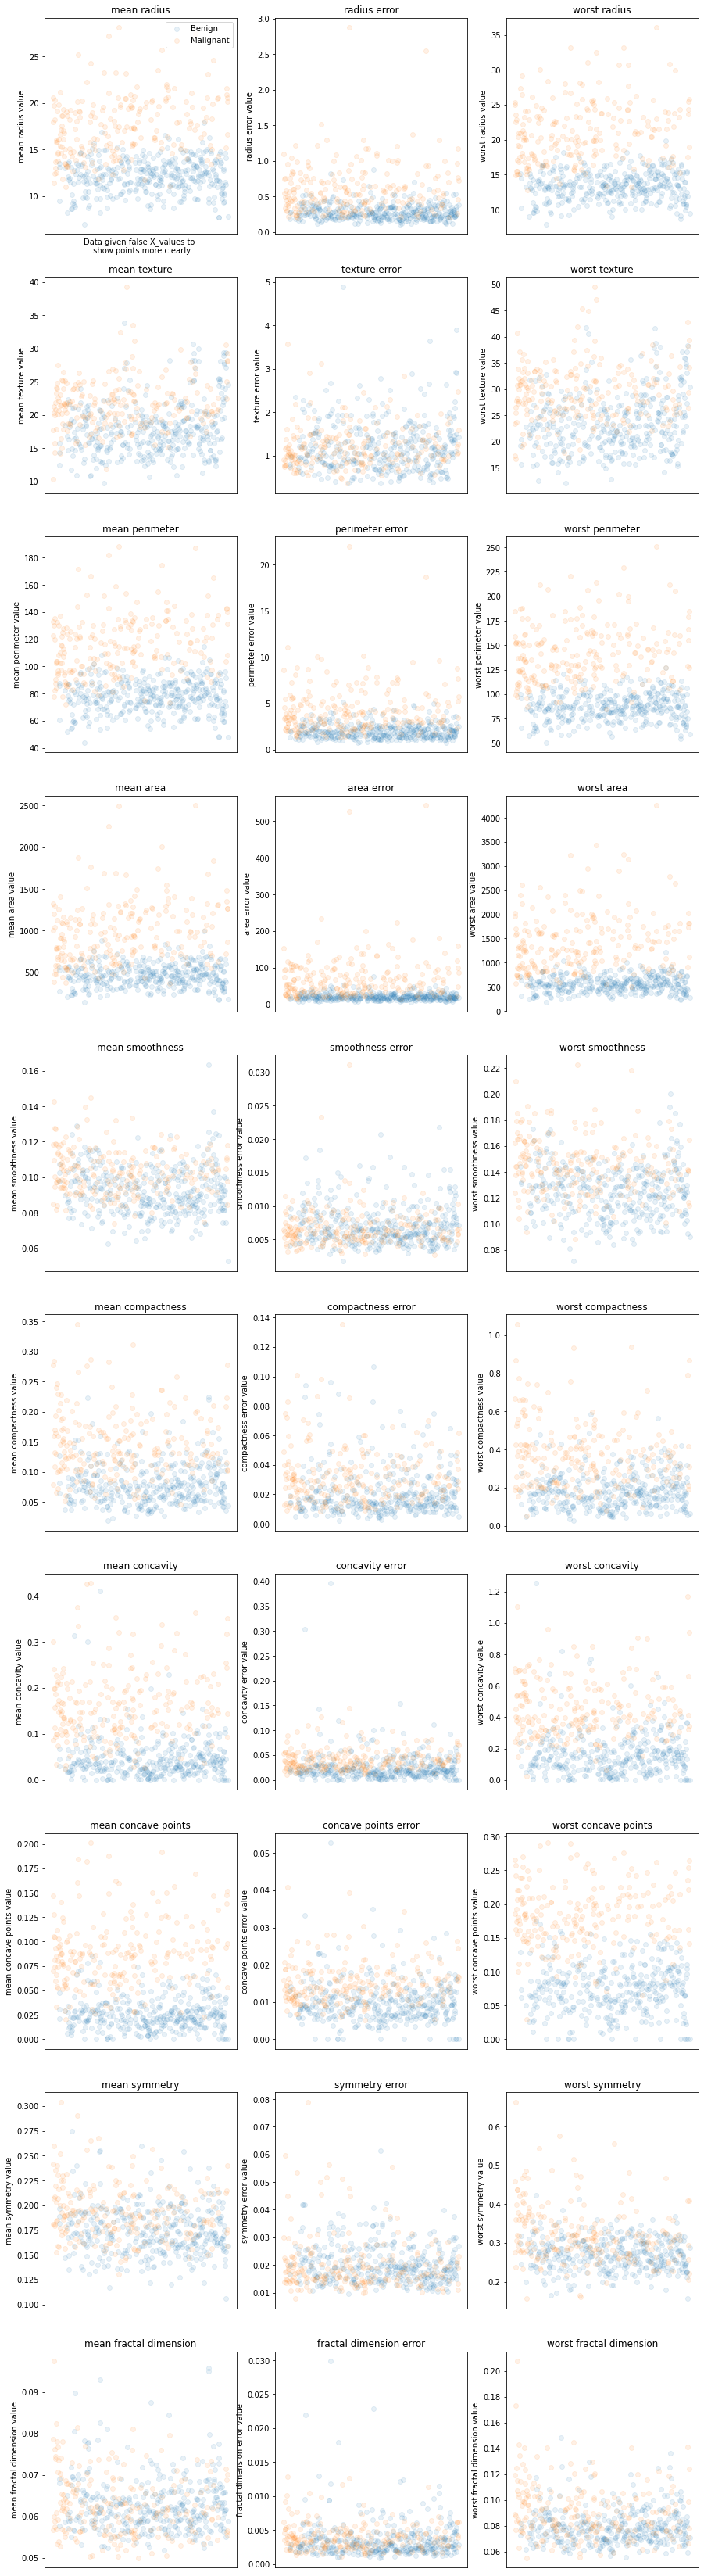

In [ ]:
#Print distribution of benign and malignant in original feature columns
fig = plt.figure(figsize = (15,60))
for index, column_name in enumerate(similar_column_ordered):
    ax = fig.add_subplot(10,3,index + 1)
    plt.scatter(x = temp_benign.index, y = temp_benign[column_name], label = 'Benign', alpha = 0.1)
    plt.scatter(x = temp_malignant.index, y = temp_malignant[column_name], label = 'Malignant', alpha = 0.1)
    plt.xticks([])
    plt.ylabel(f"{column_name} value")
    plt.title(f"{column_name}")
    if index == 0:
        plt.legend()
        plt.xlabel(f'Data given false X_values to \n show points more clearly')
        

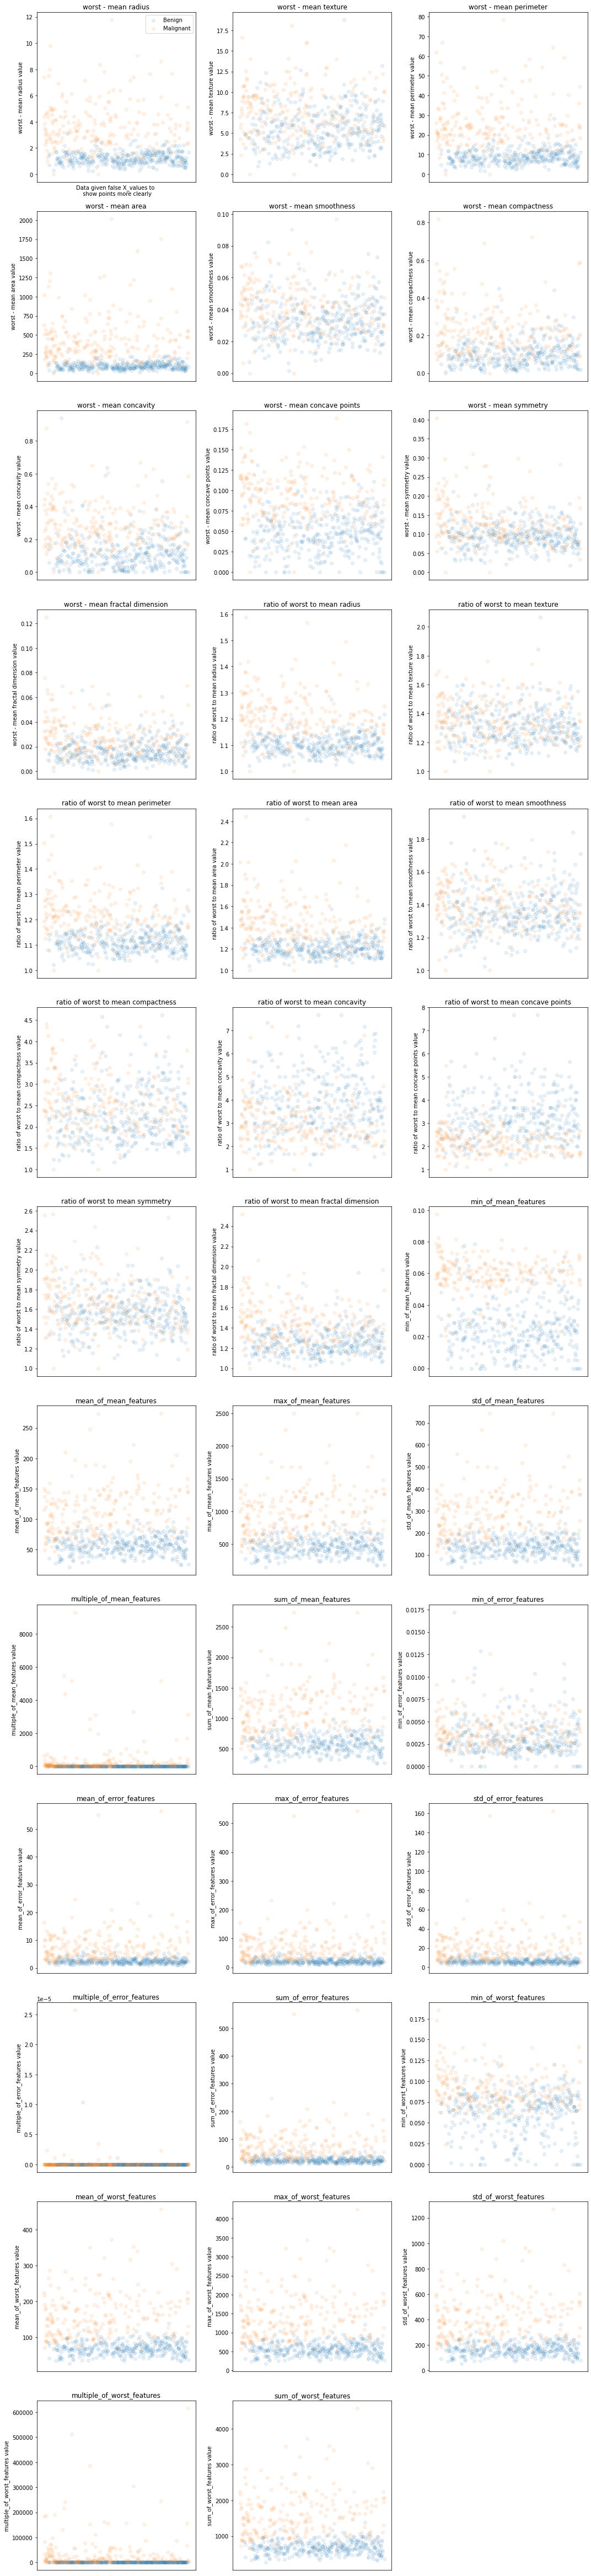

In [ ]:
#Print distribution of benign and malignant in new feature columns
fig = plt.figure(figsize = (15,100))
for index, column_name in enumerate(X_columns[30:]):
    ax = fig.add_subplot(20,3,index + 1)
    plt.scatter(x = temp_benign.index, y = temp_benign[column_name], label = 'Benign', alpha = 0.1)
    plt.scatter(x = temp_malignant.index, y = temp_malignant[column_name], label = 'Malignant', alpha = 0.1)
    plt.xticks([])
    plt.ylabel(f"{column_name} value")
    plt.title(f"{column_name}")
    if index == 0:
        plt.legend()
        plt.xlabel(f'Data given false X_values to \n show points more clearly')
plt.tight_layout()

In [ ]:
#For comparing 2 variables calculate number of permutations:
n_factorial = np.math.factorial(len(X_columns))
n_minus_r_factorial = np.math.factorial(len(X_columns) - 2)
print(f"We have {len(X_columns)} columns.")
print(f"For Comparing 2 Variables there are {int(n_factorial/ n_minus_r_factorial)} permutations")

We have 68 columns.
For Comparing 2 Variables there are 4556 permutations


4556 permutations means there are 4556 unique ways to compare 2 of the 68 variables.

We could manually print all comparisons in scatter graphs and visually pick the features that give the best separation

A more powerful method is too loop through 68 permutations (as there are 68 feature columns) at a time using a column distance to ensure no repetition of permutations.

The first run will compare columns next to each other (1 column distance)

The second run will compare columns two away from each other (2 column distance)

And so on. Then we can generate a score based on a simple K Nearest Neighbours method. The best separation will have the highest accuracy scores

In [ ]:
'''
temp_X_df = pd.DataFrame(X, columns = X_columns))
temp_y_df = pd.DataFrame(y, columns = 'Target')
seen_comparisons = []
two_variable_comparisons = pd.DataFrame({
    'variable_1': [],
    'variable_2': [],
    'accuracy_score': []})
column_length = len(X_columns)
for column_distance in np.arange(1, column_length +1):

    for index, column_name in enumerate(X_columns):
        comparison_index = index + column_distance
        if (comparison_index) >= column_length:
            comparison_index = (comparison_index) - column_length
        KNN_model = KNeighborsClassifier()
        variable_1 = X_columns[index]
        variable_2 = X_columns[comparison_index]
        KNN_model.fit(temp_X_df[[variable_1, variable_2]], temp_y_df)
        score = KNN_model.score(temp_X_df[[variable_1, variable_2]], temp_y_df)
        
        #Only add combination if its not already been seen.
        if [variable_2, variable_1] not in seen_comparisons:
            seen_comparisons.append([variable_1, variable_2])
            two_variable_comparisons = two_variable_comparisons.append({'variable_1': variable_1,
                                                                        'variable_2': variable_2,
                                                                        'accuracy_score': score},
                                                                       ignore_index = True)
top_30 = two_variable_comparisons.sort_values(by = 'accuracy_score', ascending = False)[:30]
top_30 = top_30.reset_index(drop=True)
'''
#Note the code above takes significant run time.
#For simplicity it was saved as below to github page 
#and will be loaded from there
'''
top_30.to_csv('top_30.csv')
'''

"\ntop_30.to_csv('top_30.csv')\n"

In [ ]:
top_30 = pd.read_csv('https://raw.githubusercontent.com/adbandy/data_files/main/top_30.csv', index_col = 0)
top_30

variable_1  ... accuracy_score
0          multiple_of_mean_features  ...       0.961336
1             worst - mean perimeter  ...       0.961336
2   ratio of worst to mean perimeter  ...       0.961336
3          multiple_of_mean_features  ...       0.959578
4         multiple_of_worst_features  ...       0.959578
5                  worst - mean area  ...       0.957821
6        ratio of worst to mean area  ...       0.957821
7              max_of_worst_features  ...       0.957821
8         multiple_of_worst_features  ...       0.957821
9              std_of_worst_features  ...       0.956063
10                        worst area  ...       0.956063
11                 worst - mean area  ...       0.956063
12         multiple_of_mean_features  ...       0.956063
13       ratio of worst to mean area  ...       0.956063
14                   worst perimeter  ...       0.956063
15                      mean texture  ...       0.954306
16                     worst texture  ...       0.954306
17                   worst perimeter  ...       0.954306
18                   worst perimeter  ...       0.954306
19            mean_of_worst_features  ...       0.954306
20                     worst texture  ...       0.954306
21               worst - mean radius  ...       0.952548
22         multiple_of_mean_features  ...       0.952548
23                   worst perimeter  ...       0.952548
24                    mean concavity  ...       0.952548
25                      worst radius  ...       0.952548
26         multiple_of_mean_features  ...       0.952548
27     ratio of worst to mean radius  ...       0.952548
28                    mean concavity  ...       0.952548
29                     worst texture  ...       0.952548

[30 rows x 3 columns]

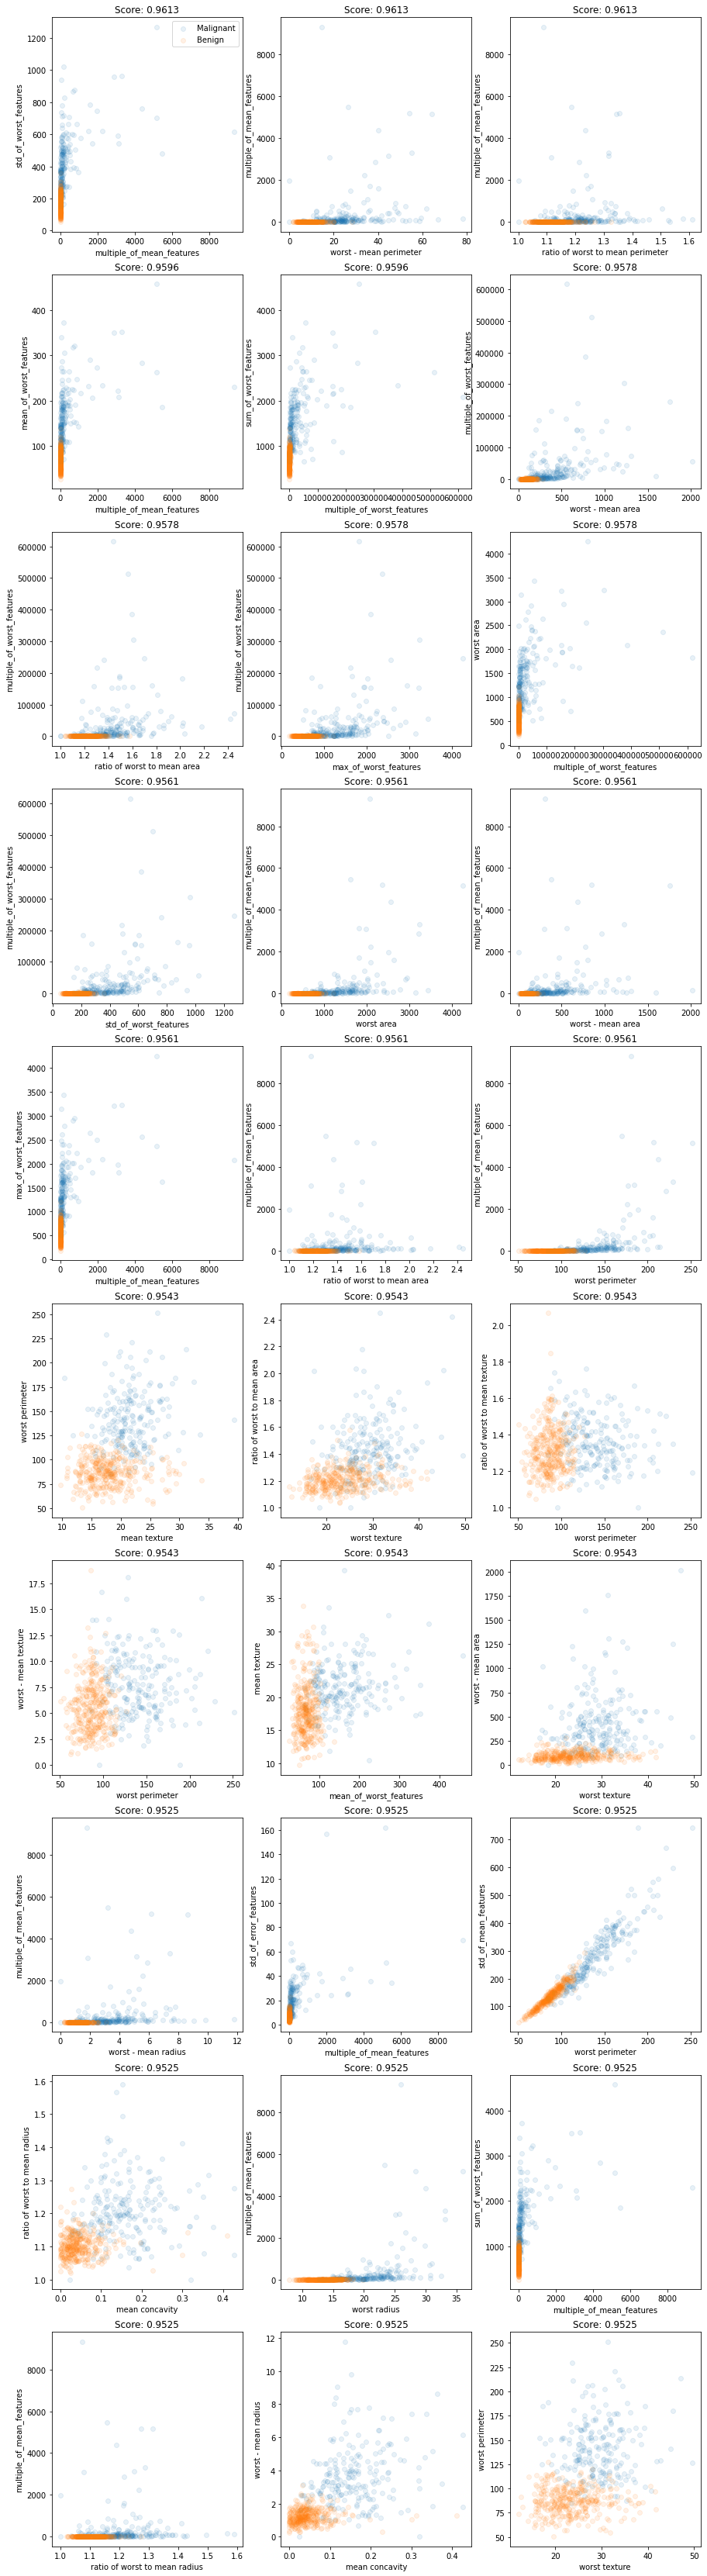

In [ ]:
#Visualise these top combinations
fig = plt.figure(figsize = (15,60))
for index in np.arange(len(top_30)):
    variable_1 = top_30['variable_1'].iloc[index]
    variable_2 = top_30['variable_2'].iloc[index]
    score = top_30['accuracy_score'].iloc[index]
    
    ax = fig.add_subplot(10,3,index + 1)
    plt.scatter(x = temp_malignant[variable_1], y = temp_malignant[variable_2], label = 'Malignant', alpha = 0.1)
    plt.scatter(x = temp_benign[variable_1], y = temp_benign[variable_2], label = 'Benign', alpha = 0.1)
    plt.xlabel(variable_1)
    plt.ylabel(variable_2)
    plt.title(f"Score: {score:.4f}")
    if index == 0:
        plt.legend()


Clearly our newly created features will have value in separation of clusters.

## 1.5) Feature Engineering - Standardisation

First we will split the data into a training set and testing set in an (80:20 ratio)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"The % proportions of classes in the splits are:")
print(f"Training benign: {((len(y_train[y_train == 1]) / len(y_train)) * 100):.2f}%")
print(f"Training malignant: {((len(y_train[y_train == 0]) / len(y_train)) * 100):.2f}%\n")
print(f"Testing benign: {((len(y_test[y_test == 1]) / len(y_test)) * 100):.2f}%")
print(f"Testing malignant: {((len(y_test[y_test == 0]) / len(y_test)) * 100):.2f}%")

# \ny_train :\n{round(y_train.value_counts(normalize=True)*100,2)}\n\ny_test:\n{round(y_test.value_counts(normalize=True)*100,2)}")

The % proportions of classes in the splits are:
Training benign: 62.64%
Training malignant: 37.36%

Testing benign: 63.16%
Testing malignant: 36.84%


As we can see our split is sufficiently stratified.


We must use X_train to fit a scaler. Then rescale the X_train and X_test. This is done to give each column equal importance in the modelling. 


In [ ]:
columns = X_columns
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)
#Seperate scaling required for clustering as train test is meaningless here
full_scaler = StandardScaler().fit(X)
X = full_scaler.transform(X)
#Display a scaled preview. 
pd.DataFrame(X, columns = columns).head()

mean radius  mean texture  ...  multiple_of_worst_features  sum_of_worst_features
0     1.097064     -2.073335  ...                    3.438243               1.999948
1     1.829821     -0.353632  ...                   -0.193513               1.861349
2     1.579888      0.456187  ...                    0.390523               1.447499
3    -0.768909      0.253732  ...                    1.379982              -0.525709
4     1.750297     -1.151816  ...                   -0.226606               1.209882

[5 rows x 68 columns]

In [ ]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))
#print(type(X_train_pca))
#print(type(X_test_pca))
#print(type(X_pca))
#print(type(X_pca))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:
#Check for nan values generated during standardisation
pd.DataFrame(X, columns = columns).isna().sum().sort_values(ascending = False)

ratio of worst to mean concave points       13
ratio of worst to mean concavity            13
mean radius                                  0
ratio of worst to mean area                  0
ratio of worst to mean fractal dimension     0
                                            ..
worst symmetry                               0
worst fractal dimension                      0
worst - mean radius                          0
worst - mean texture                         0
sum_of_worst_features                        0
Length: 68, dtype: int64

As discussed earlier these values are errors generated as numpy was unable to store values so small in float 64. Having standardised the data we can safely replace these with zeros.

In [ ]:
X = np.nan_to_num(X, nan = 0.0)
X_train = np.nan_to_num(X_train, nan = 0.0)
X_test = np.nan_to_num(X_test, nan = 0.0)

In [ ]:
#Simple check to show this worked.
pd.DataFrame(X, columns = columns).isna().sum().sort_values(ascending = False)

mean radius                                 0
ratio of worst to mean area                 0
ratio of worst to mean fractal dimension    0
ratio of worst to mean symmetry             0
ratio of worst to mean concave points       0
                                           ..
worst symmetry                              0
worst fractal dimension                     0
worst - mean radius                         0
worst - mean texture                        0
sum_of_worst_features                       0
Length: 68, dtype: int64

In [ ]:
#repeat for X_test:
pd.DataFrame(X_test, columns = columns).isna().sum().sort_values(ascending = False)

mean radius                                 0
ratio of worst to mean area                 0
ratio of worst to mean fractal dimension    0
ratio of worst to mean symmetry             0
ratio of worst to mean concave points       0
                                           ..
worst symmetry                              0
worst fractal dimension                     0
worst - mean radius                         0
worst - mean texture                        0
sum_of_worst_features                       0
Length: 68, dtype: int64

In [ ]:
#repeat for X_train:
pd.DataFrame(X_train, columns = columns).isna().sum().sort_values(ascending = False)

mean radius                                 0
ratio of worst to mean area                 0
ratio of worst to mean fractal dimension    0
ratio of worst to mean symmetry             0
ratio of worst to mean concave points       0
                                           ..
worst symmetry                              0
worst fractal dimension                     0
worst - mean radius                         0
worst - mean texture                        0
sum_of_worst_features                       0
Length: 68, dtype: int64

## 1.6)  Feature Engineering: Dimensionallity Reduction - Using PCA

Principle Component Analysis is a technique used to transform the data and determine new features that explain variance more succinctly. 

The mathematics is complex. The aim is to be able to reduce the feature space significantly and avoid the 'curse of dimensionality'. 

In essence as the number of features increases, the amount of data required to sufficiently explain it can grow exponentially.

In [ ]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))
#print(type(X_train_pca))
#print(type(X_test_pca))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


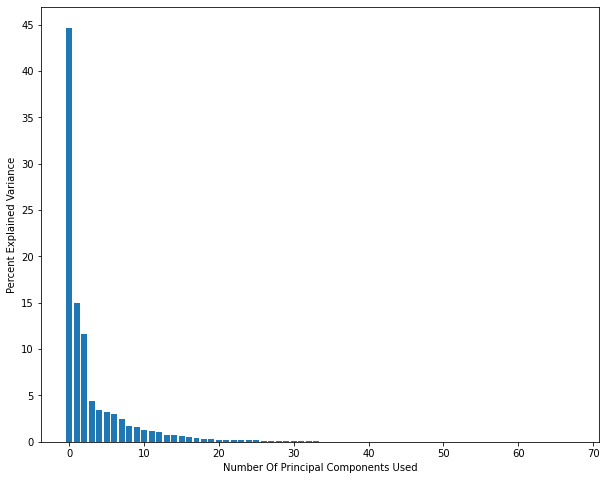

In [ ]:
#Instantiate the PCA and fit using the training data.
pca = PCA()
pca.fit(X_train)

#Then transform the train and test X using this fitted PCA 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
pca_var_perc = pca.explained_variance_ratio_ * 100

# PCA all data
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)

#plot variance explained for each new feature 
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8))
ax.bar(x=[i for i in range(len(pca_var_perc))],height=pca_var_perc)
plt.xlabel("Number Of Principal Components Used")
plt.ylabel("Percent Explained Variance")
plt.yticks(np.arange(0,50,5))
plt.show()

In [ ]:
#Display same information in value format
pca_explained_variance = pd.DataFrame(pca.explained_variance_ratio_).head(15)
pca_explained_variance.columns = ['% Of Explained Variance In Each Column']
pca_explained_variance.apply(lambda x: round(x,3))

% Of Explained Variance In Each Column
0                                    0.438
1                                    0.161
2                                    0.113
3                                    0.044
4                                    0.035
5                                    0.031
6                                    0.030
7                                    0.025
8                                    0.018
9                                    0.016
10                                   0.013
11                                   0.011
12                                   0.010
13                                   0.008
14                                   0.007

In [ ]:
#Store as dataframe for plotting purposes
pca_var_perc_df = pd.DataFrame(X_train_pca)
pca_var_perc_df['target'] = y_train
pca_var_perc_df.head()

0         1         2  ...            66            67  target
0  3.954508 -0.158651 -0.471275  ...  2.787855e-17 -3.644717e-18       0
1  4.901028  4.669409  1.662661  ...  2.277532e-16  4.702184e-16       0
2 -7.491696  0.943374 -0.855354  ...  8.116382e-16 -7.878437e-16       1
3 -3.056492 -1.134932  0.359361  ...  3.324651e-16 -9.557898e-17       1
4 -5.208746  4.263904  0.167706  ...  9.052082e-16 -5.111859e-16       1

[5 rows x 69 columns]

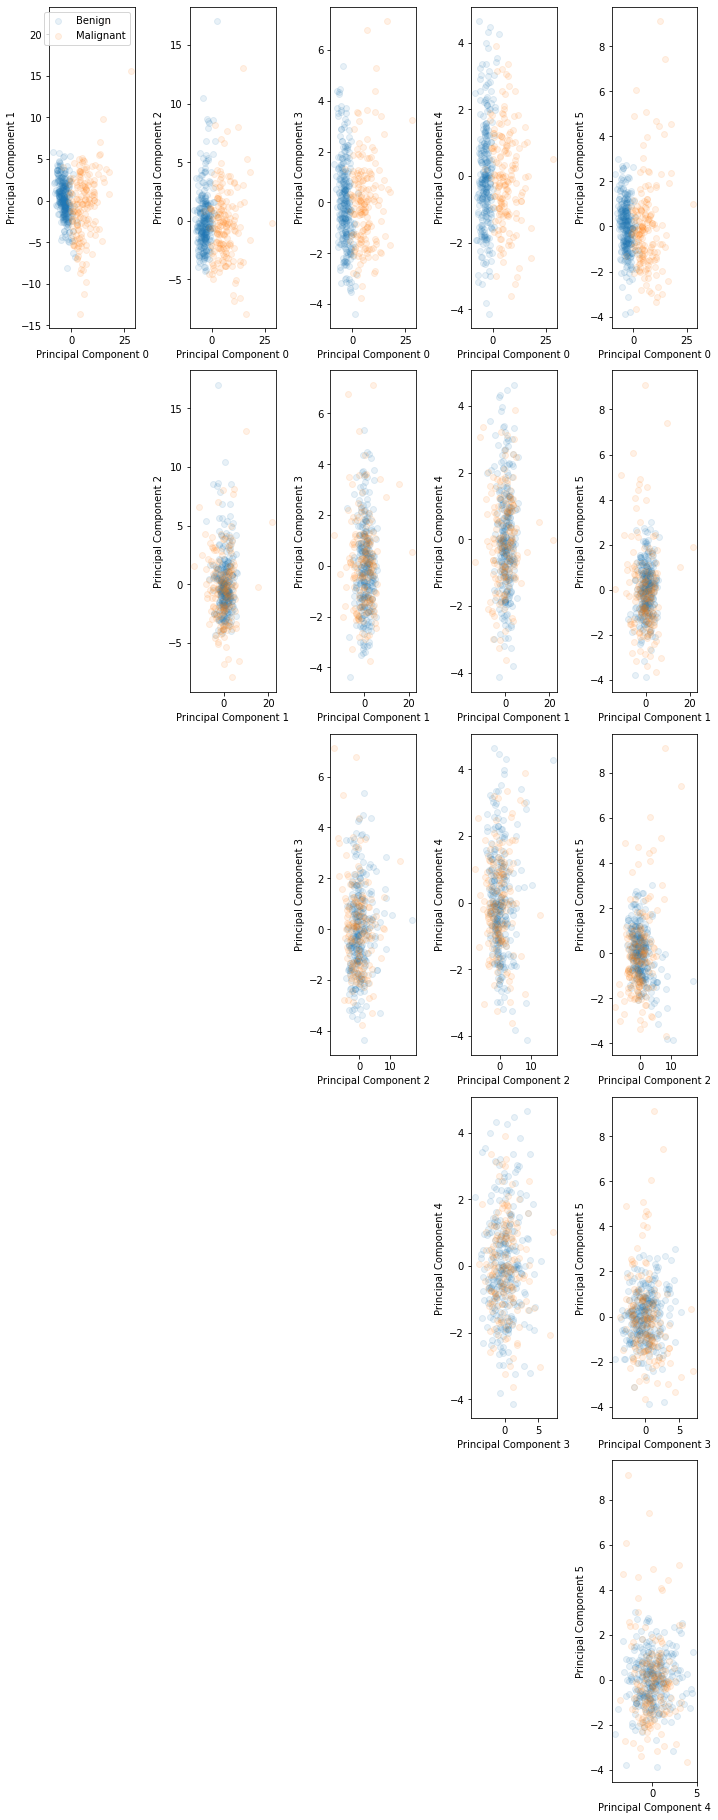

In [ ]:
#Plot distribution of data for two PCA variable x,y graphs.

sub_df_benign = pca_var_perc_df[pca_var_perc_df['target'] == 1] 
sub_df_malignant = pca_var_perc_df[pca_var_perc_df['target'] == 0]

fig = plt.figure(figsize = (10,30))
for i in range(5):
  for j in  range(5):
    if (i == 0) & (j == 0):
      fig.add_subplot(6,5, 1)
      plt.xlabel(f"Principal Component 0")
      plt.ylabel(f"Principal Component 1")

      plt.scatter(sub_df_benign[sub_df_benign.columns[i]], sub_df_benign[sub_df_benign.columns[j+1]], alpha = 0.1, label = 'Benign')
      plt.scatter(sub_df_malignant[sub_df_malignant.columns[i]], sub_df_malignant[sub_df_malignant.columns[j+1]], alpha = 0.1, label = 'Malignant')
      plt.legend()
    #Remove duplicate graphs (i.e Component 1 vs 0 is same as Component 0 vs 1)
    elif i > (j):
      pass
    else:
      fig.add_subplot(6,5, ((i*5)+(j+1)))
      plt.xlabel(f"Principal Component {i}")
      plt.ylabel(f"Principal Component {j+1}")

      plt.scatter(sub_df_benign[sub_df_benign.columns[i]], sub_df_benign[sub_df_benign.columns[j+1]], alpha = 0.1, label = 'Benign')
      plt.scatter(sub_df_malignant[sub_df_malignant.columns[i]], sub_df_malignant[sub_df_malignant.columns[j+1]], alpha = 0.1, label = 'Malignant')

plt.tight_layout()

## 1.7) Feature Engineering - Dimensionality Reduction- K-PCA

Kernel PCA is another similar technique compared to PCA but can work better on more complex relationships.

In [ ]:
#Kernel PCA, Instantiate, fit and transform data.

k_pca = KernelPCA()
k_pca.fit(X_train)
X_train_k_pca = k_pca.transform(X_train)
X_test_k_pca = k_pca.transform(X_test)

In [ ]:
#Store as dataframe for plotting purposes
k_pca_var_perc_df = pd.DataFrame(X_train_k_pca)
k_pca_var_perc_df['target'] = y_train
k_pca_var_perc_df.head()

0         1         2         3  ...        46        47        48  target
0  3.954508 -0.158651 -0.471275 -1.431267  ...  0.000103  0.000021  0.000013       0
1  4.901028  4.669409  1.662661 -2.260143  ...  0.000590  0.000384  0.000013       0
2 -7.491696  0.943374 -0.855354  1.019061  ... -0.000150 -0.000160  0.000099       1
3 -3.056492 -1.134932  0.359361 -2.461606  ... -0.000249  0.000061  0.000029       1
4 -5.208746  4.263904  0.167706 -1.001547  ... -0.000098 -0.000004 -0.000003       1

[5 rows x 50 columns]

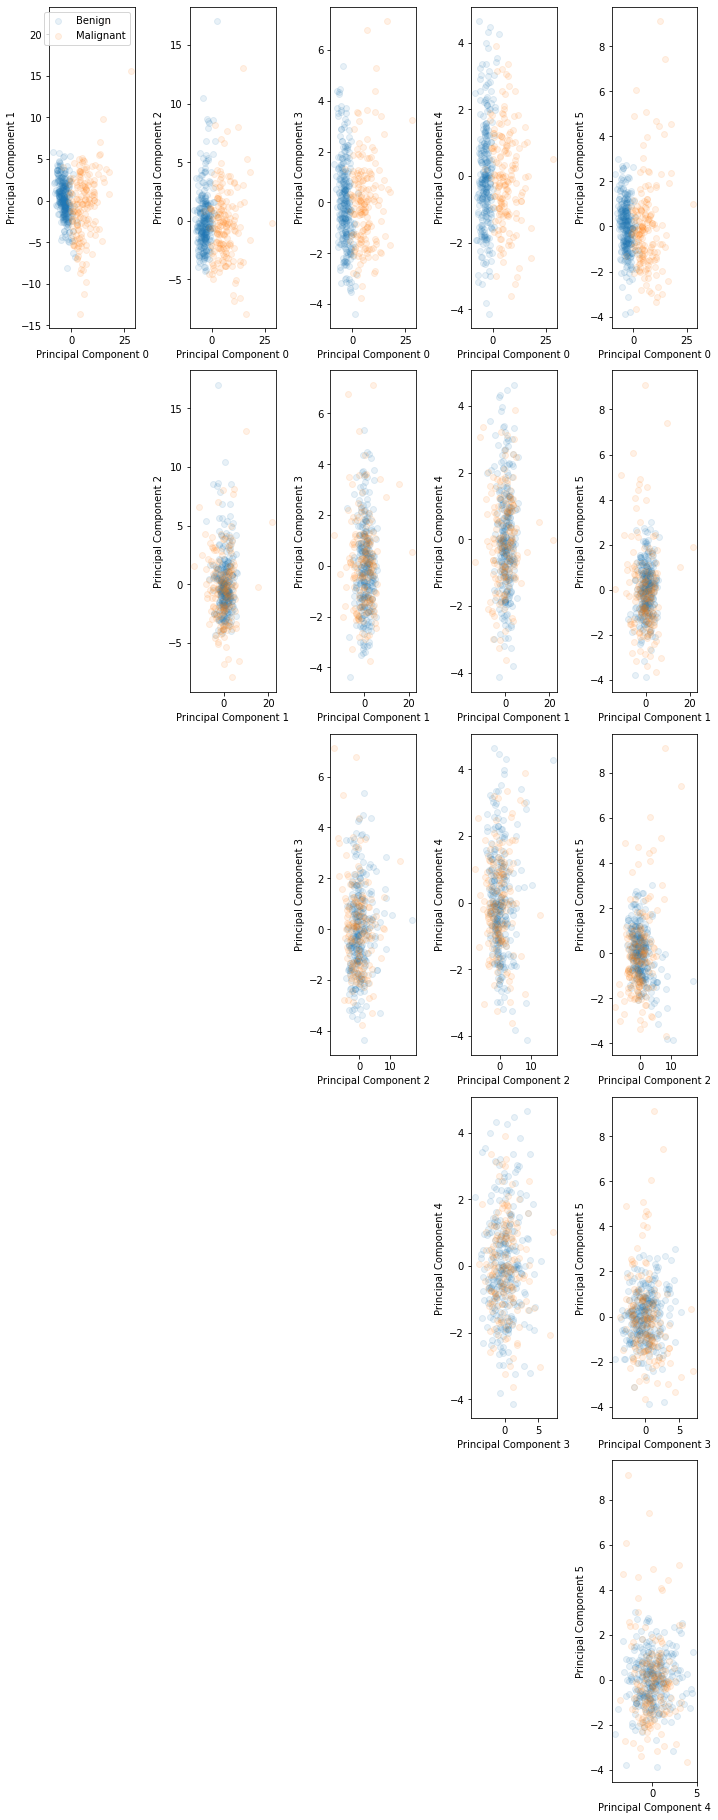

In [ ]:
#Plot distribution of data for two K-PCA variable x,y graphs.


sub_df_benign = k_pca_var_perc_df[k_pca_var_perc_df['target'] == 1] 
sub_df_malignant = k_pca_var_perc_df[k_pca_var_perc_df['target'] == 0]

fig = plt.figure(figsize = (10,30))
for i in range(5):
  for j in  range(5):
    if (i == 0) & (j == 0):
      fig.add_subplot(6,5, 1)
      plt.xlabel(f"Principal Component 0")
      plt.ylabel(f"Principal Component 1")

      plt.scatter(sub_df_benign[sub_df_benign.columns[i]], sub_df_benign[sub_df_benign.columns[j+1]], alpha = 0.1, label = 'Benign')
      plt.scatter(sub_df_malignant[sub_df_malignant.columns[i]], sub_df_malignant[sub_df_malignant.columns[j+1]], alpha = 0.1, label = 'Malignant')
      plt.legend()
    #Remove duplicate graphs (i.e Component 1 vs 0 is same as Component 0 vs 1)
    elif i > (j):
      pass
    else:
      fig.add_subplot(6,5, ((i*5)+(j+1)))
      plt.xlabel(f"Principal Component {i}")
      plt.ylabel(f"Principal Component {j+1}")

      plt.scatter(sub_df_benign[sub_df_benign.columns[i]], sub_df_benign[sub_df_benign.columns[j+1]], alpha = 0.1, label = 'Benign')
      plt.scatter(sub_df_malignant[sub_df_malignant.columns[i]], sub_df_malignant[sub_df_malignant.columns[j+1]], alpha = 0.1, label = 'Malignant')

plt.tight_layout()

## 1.8)  Feature Engineering - Comparing PCA with K_PCA
Visually these two methods appear to show similar results.

Below is a replot of the first rows from each graphic.

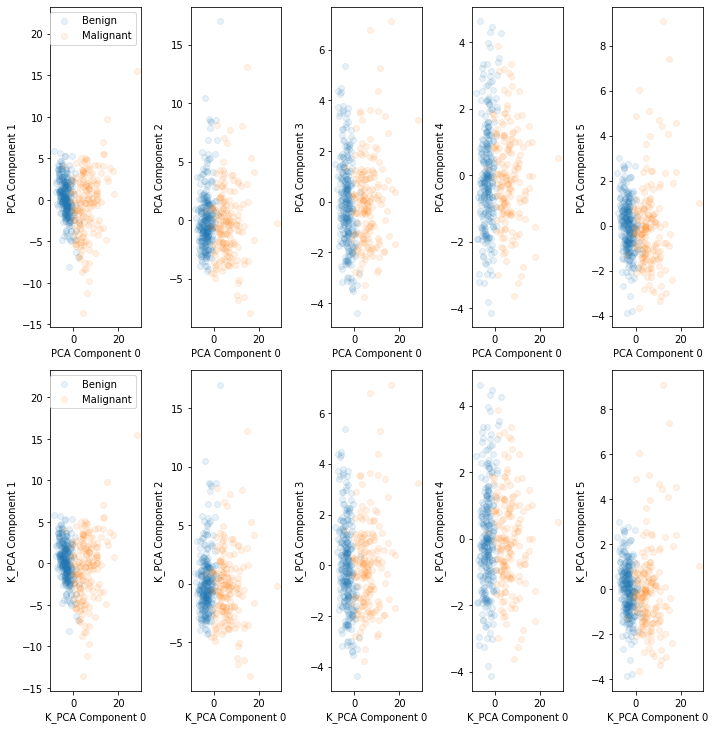

In [ ]:
#Plot first row of each graphic (PCA and K-PCA)

sub_df_benign_pca = k_pca_var_perc_df[k_pca_var_perc_df['target'] == 1] 
sub_df_malignant_pca = k_pca_var_perc_df[k_pca_var_perc_df['target'] == 0]

sub_df_benign_k_pca = k_pca_var_perc_df[k_pca_var_perc_df['target'] == 1] 
sub_df_malignant_k_pca = k_pca_var_perc_df[k_pca_var_perc_df['target'] == 0]

fig = plt.figure(figsize = (10,30))

for i in [0]:
  for j in  range(5):
    if (i == 0) & (j == 0):
      fig.add_subplot(6,5, 1)
      plt.xlabel(f"PCA Component 0")
      plt.ylabel(f"PCA Component 1")

      plt.scatter(sub_df_benign_pca[sub_df_benign_pca.columns[i]], sub_df_benign_pca[sub_df_benign_pca.columns[j+1]], alpha = 0.1, label = 'Benign')
      plt.scatter(sub_df_malignant_pca[sub_df_malignant_pca.columns[i]], sub_df_malignant_pca[sub_df_malignant_pca.columns[j+1]], alpha = 0.1, label = 'Malignant')
      plt.legend()
    else:
      fig.add_subplot(6,5, ((i*5)+(j+1)))
      plt.xlabel(f"PCA Component {i}")
      plt.ylabel(f"PCA Component {j+1}")

      plt.scatter(sub_df_benign_pca[sub_df_benign_pca.columns[i]], sub_df_benign_pca[sub_df_benign_pca.columns[j+1]], alpha = 0.1, label = 'Benign')
      plt.scatter(sub_df_malignant_pca[sub_df_malignant_pca.columns[i]], sub_df_malignant_pca[sub_df_malignant_pca.columns[j+1]], alpha = 0.1, label = 'Malignant')     


for i in [0]:
  for j in  range(5):
    if (i == 0) & (j == 0):
      fig.add_subplot(6,5, 6)
      plt.xlabel(f"K_PCA Component 0")
      plt.ylabel(f"K_PCA Component 1")

      plt.scatter(sub_df_benign_k_pca[sub_df_benign_k_pca.columns[i]], sub_df_benign_k_pca[sub_df_benign_k_pca.columns[j+1]], alpha = 0.1, label = 'Benign')
      plt.scatter(sub_df_malignant_k_pca[sub_df_malignant_k_pca.columns[i]], sub_df_malignant_k_pca[sub_df_malignant.columns[j+1]], alpha = 0.1, label = 'Malignant')
      plt.legend()
    else:
      fig.add_subplot(6,5, (5+j+1))
      plt.xlabel(f"K_PCA Component {i}")
      plt.ylabel(f"K_PCA Component {j+1}")

      plt.scatter(sub_df_benign_k_pca[sub_df_benign_k_pca.columns[i]], sub_df_benign_k_pca[sub_df_benign_k_pca.columns[j+1]], alpha = 0.1, label = 'Benign')
      plt.scatter(sub_df_malignant_k_pca[sub_df_malignant_k_pca.columns[i]], sub_df_malignant_k_pca[sub_df_malignant.columns[j+1]], alpha = 0.1, label = 'Malignant')

plt.tight_layout()

No discernable differences between PCA and k_PCA

In [ ]:
#Having completed feature engineering we can also store X as a dataframe for plotting purposes later.
X = pd.DataFrame(X, columns = X_columns)
y = pd.Series(y)

In [ ]:
#And store train test splits as dataframes for plotting purposes later.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"The % proportions of classes in the splits are:")
print(f"Training benign: {((len(y_train[y_train == 1]) / len(y_train)) * 100):.2f}%")
print(f"Training malignant: {((len(y_train[y_train == 0]) / len(y_train)) * 100):.2f}%\n")
print(f"Testing benign: {((len(y_test[y_test == 1]) / len(y_test)) * 100):.2f}%")
print(f"Testing malignant: {((len(y_test[y_test == 0]) / len(y_test)) * 100):.2f}%")

The % proportions of classes in the splits are:
Training benign: 62.64%
Training malignant: 37.36%

Testing benign: 63.16%
Testing malignant: 36.84%


In [ ]:
print(type(X))
print(type(X_pca))

print(type(X_train))
print(type(X_test))
print(type(X_pca))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [ ]:
X_all = X.to_numpy()
y_all = y.to_numpy()

X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [ ]:
print(type(X_all))
print(type(X_pca))

print(type(X_train_np))
print(type(X_test_np))

print(type(X_pca))
print(type(y_all))

print(type(X_train_pca))
print(type(X_test_pca))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
